Install necessary libraries

In [75]:
import string
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry


Looking at the data

In [76]:
pd.set_option('display.max_rows', None)  

#open dataset
dataset = pd.read_csv("covid-data.csv")
dataset.head()
dataset.shape #we have 213096 rows with 67 features
dataset.columns.tolist() #list the features

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

Number of data missing

In [77]:
#number of missing data
def missingData():
    return dataset.isnull().sum()
missingData()

iso_code                                           0
continent                                      12283
location                                           0
date                                               0
total_cases                                     8900
new_cases                                       9135
new_cases_smoothed                             10317
total_deaths                                   27694
new_deaths                                     27745
new_deaths_smoothed                            28920
total_cases_per_million                         9837
new_cases_per_million                          10072
new_cases_smoothed_per_million                 11249
total_deaths_per_million                       28618
new_deaths_per_million                         28669
new_deaths_smoothed_per_million                29839
reproduction_rate                              53447
icu_patients                                  185828
icu_patients_per_million                      

Percentage wise of data missing

In [78]:
#percentage of missing data
def missingDataPercentage():
    total_cells = np.product(dataset.shape)
    total_missing = missingData().sum()   
    return round((total_missing/total_cells)*100,2)
missingDataPercentage()


44.89

In [79]:
def missingDataPercentagePerFeature():
    return round(dataset.isnull().sum()/len(dataset)*100,2)
missingDataPercentagePerFeature()

iso_code                                       0.00
continent                                      5.76
location                                       0.00
date                                           0.00
total_cases                                    4.18
new_cases                                      4.29
new_cases_smoothed                             4.84
total_deaths                                  13.00
new_deaths                                    13.02
new_deaths_smoothed                           13.57
total_cases_per_million                        4.62
new_cases_per_million                          4.73
new_cases_smoothed_per_million                 5.28
total_deaths_per_million                      13.43
new_deaths_per_million                        13.45
new_deaths_smoothed_per_million               14.00
reproduction_rate                             25.08
icu_patients                                  87.20
icu_patients_per_million                      87.20
hosp_patient

Pie plot of missing data

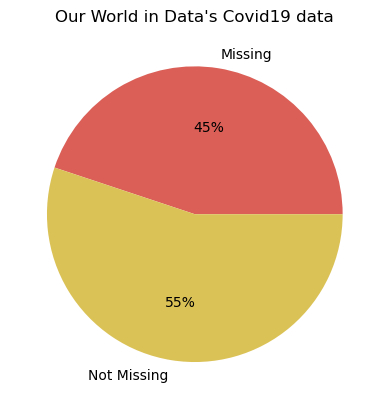

In [80]:
def piePlotMissingData():
    missing_data_values = missingData()
    total_cells = np.product(dataset.shape)
    total_missing = missing_data_values.sum()  
    labels = ['Missing','Not Missing']
    rounded_missing_percentage = round((total_missing/total_cells)*100,2)
    total_percentage = 100-rounded_missing_percentage
    data = [rounded_missing_percentage,total_percentage]
    colors = sns.color_palette("hls", 8)
    plt.pie(data,labels=labels, colors=colors,autopct='%.0f%%')
    plt.title("Our World in Data's Covid19 data")
    plt.show()
piePlotMissingData()

bar graph of missing values per feature

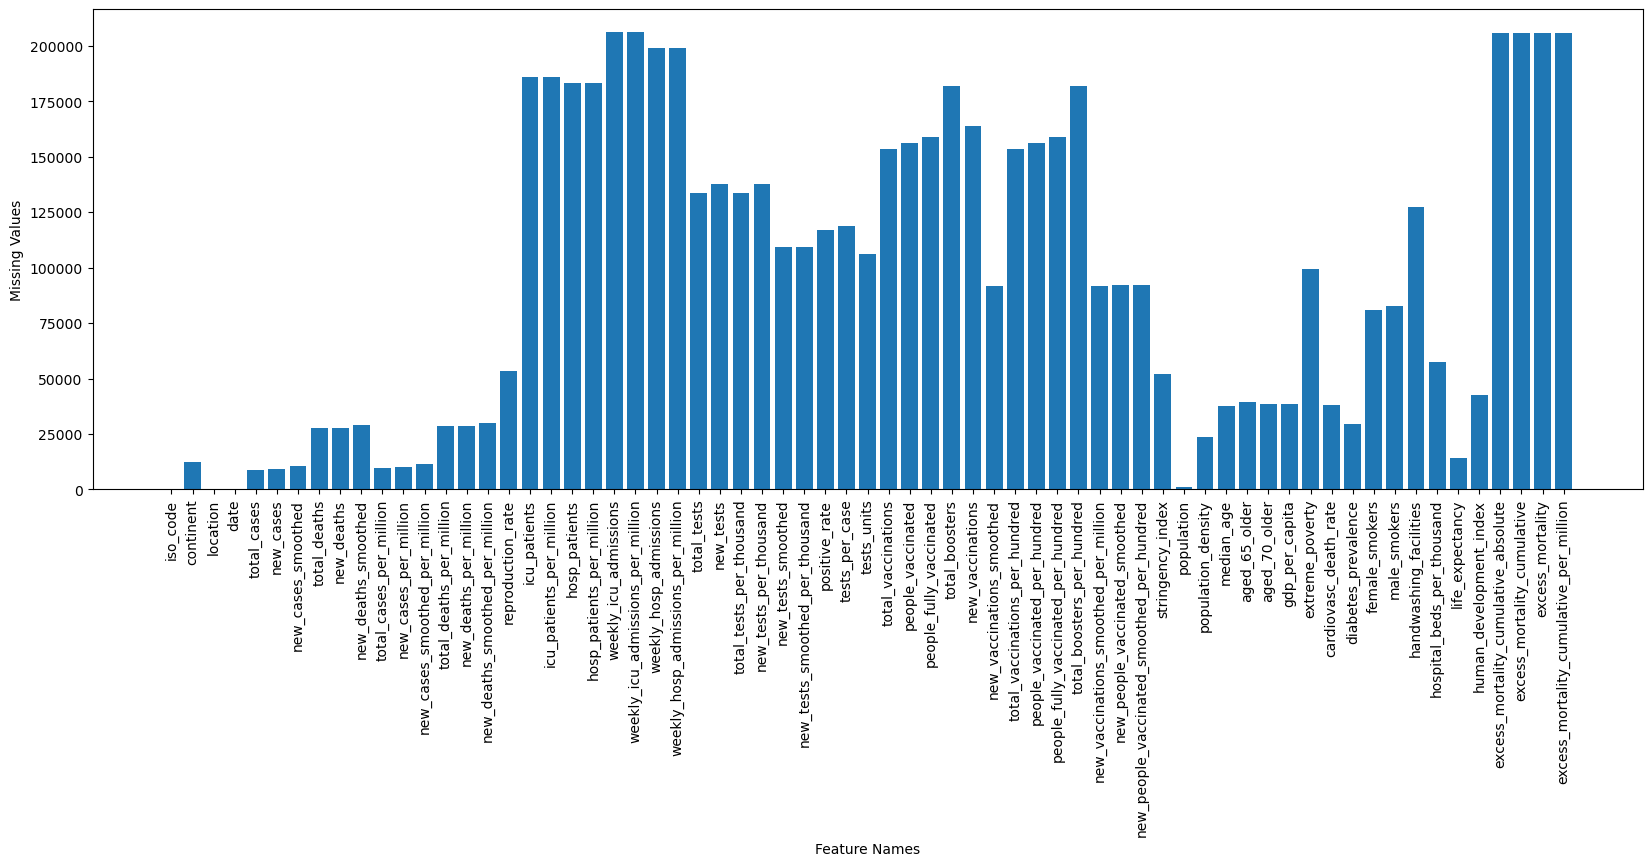

In [81]:
def graphMissingDataValues():
    missing_data_values = missingData()
    missing_values = missing_data_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['feature']
    missing_values['feature'] = missing_values.index
    plt.figure(figsize=(20,10))
    plt.gcf().subplots_adjust(bottom=0.40)
    plt.bar(missing_values['feature'],missing_values['count'])
    plt.xticks(rotation = 90)
    plt.xlabel("Feature Names")
    plt.ylabel("Missing Values")
    plt.show()
graphMissingDataValues()

Unique countries

In [82]:
dataset['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

"Location" feature has a lot of really unique locations, it is wrong to go about calling locations as countries, as some of them have territories, cruisers, even general terms as continents and world. Although They listed some continents in location to have an overview sight on how different continents react.

As far as I can see right now, we have two options.

1) If the location is the value of a continent fill the continent row with such values, if it is an island or territory, we either associated to the closes't continent or/and create a new term "island" where all the islands will go into. (Maybe there is a library that can help with such geographical cleaning). As for cruisers, I believe the best thing is to drop them as well as the term "World". Since cruiser information won't really be valuable in the future dates as cruisers eventually embark and disembark somewhere else (This might not even be the original destination due to political reasons).  As for "world" it is too general to serve any valuable information about our goal which is to tell death rate in the future by countries.
2) Drop the rows where location is a continent. Since most location information is by country we can either change it or create a new column for countries, in which the "continent" feature is already giving information about the continent and its association with the country.

In [83]:
dataset['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

Installed a country list for further viewing

In [85]:
dataset['iso_code'].shape

(213096,)

Dropped the unique regions that do not have an iso_code for country

In [86]:
iso_to_drop_list = ['OWID_AFR','OWID_ASI','OWID_EUR','OWID_EUN','OWID_HIC','OWID_INT','OWID_KOS','OWID_LIC','OWID_LMC','OWID_NAM','OWID_CYN','OWID_OCE','OWID_SAM','OWID_UMC','OWID_WRL']

for iso_to_drop in iso_to_drop_list:
    dataset.drop(dataset[dataset['iso_code'] == iso_to_drop].index,inplace=True)

We can see how many rows we have left after dropping special iso_codes

In [87]:
dataset['iso_code'].shape

(199595,)

Excess mortality associated feature columns have a lot of missing data, almost 96% and are either filled with data that it is probably not correct, given how countries report mortality. Lower income countries tend to unreport and even developed countries can take days, months, up to a year to report it. Making the data hard to manage.

In [96]:
dataset['date'] = pd.to_datetime(dataset['date'],format="%Y-%m-%d")
dataset['date'].dtype #now we have a datetime64 type and not an object type

dtype('<M8[ns]')

track features of countries

In [89]:
def TrackFeatureByCountryGraph(country: string, track_feature: string):
    gk = dataset.groupby("location")
    gk = gk.get_group(country)
    plt.figure(figsize=(20,10))
    plt.xlabel("Date")
    plt.ylabel(track_feature)
    if(country[len(country)-1] == 's'):
        plt.title(country + "' total number of Covid19 " + track_feature + " over time")
    else:
        plt.title(country + "'s total number of Covid19 " + track_feature + " over time")
    plt.grid(True)
    plt.fill_between(gk['date'],gk[track_feature])
    plt.show()

Exampled with Vietnam, Mexico, and United States

Vietnam - new deaths

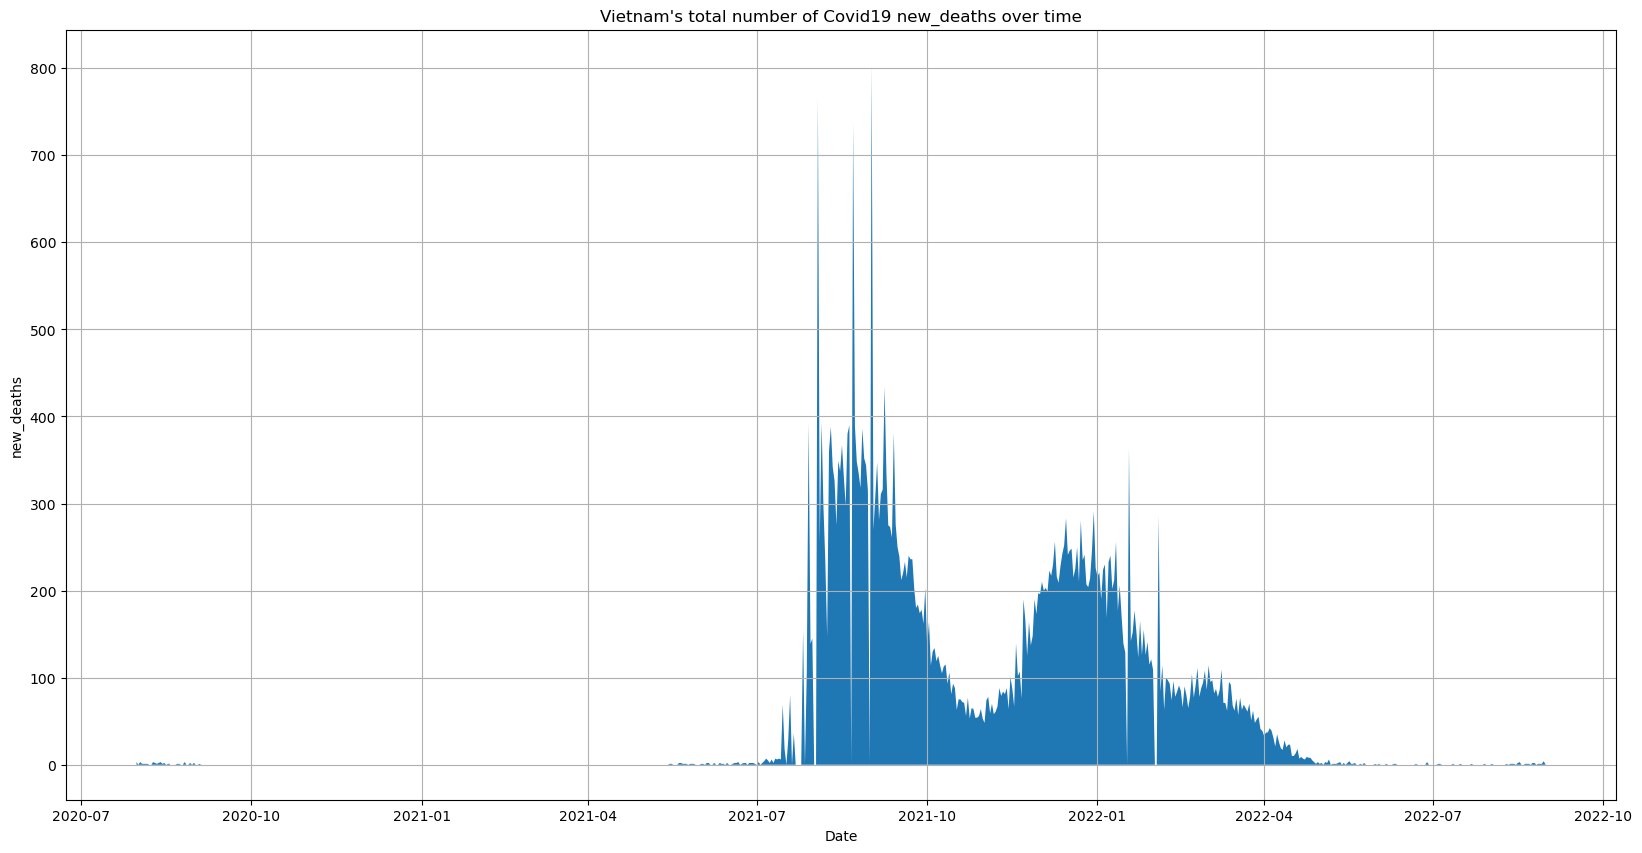

In [90]:
TrackFeatureByCountryGraph("Vietnam", "new_deaths")

Mexico - new deaths

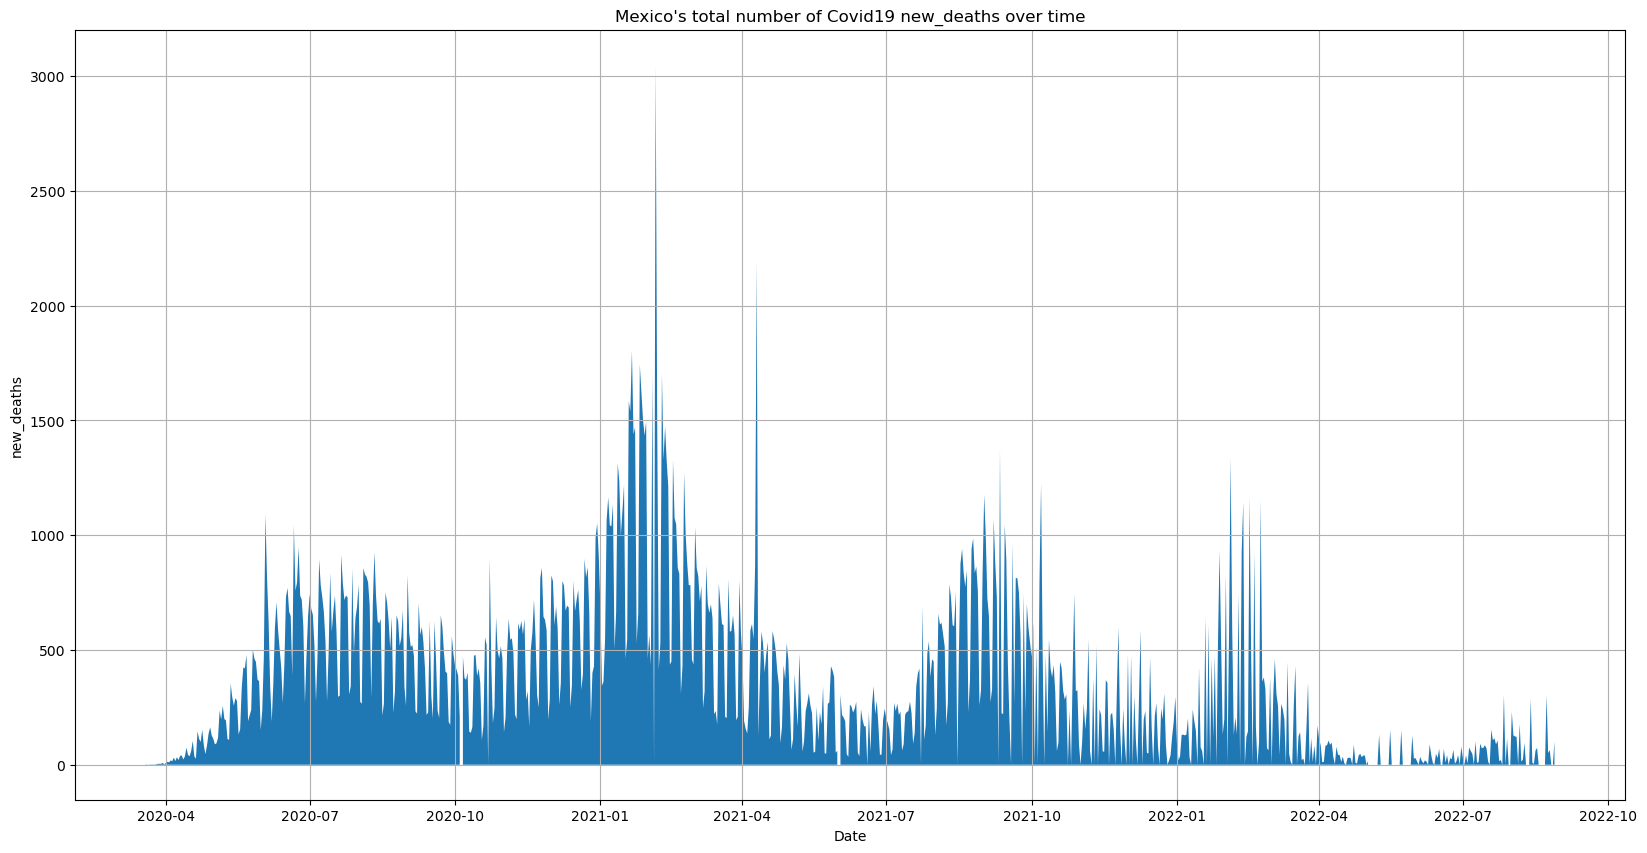

In [91]:
TrackFeatureByCountryGraph("Mexico", "new_deaths")

United States - new deaths

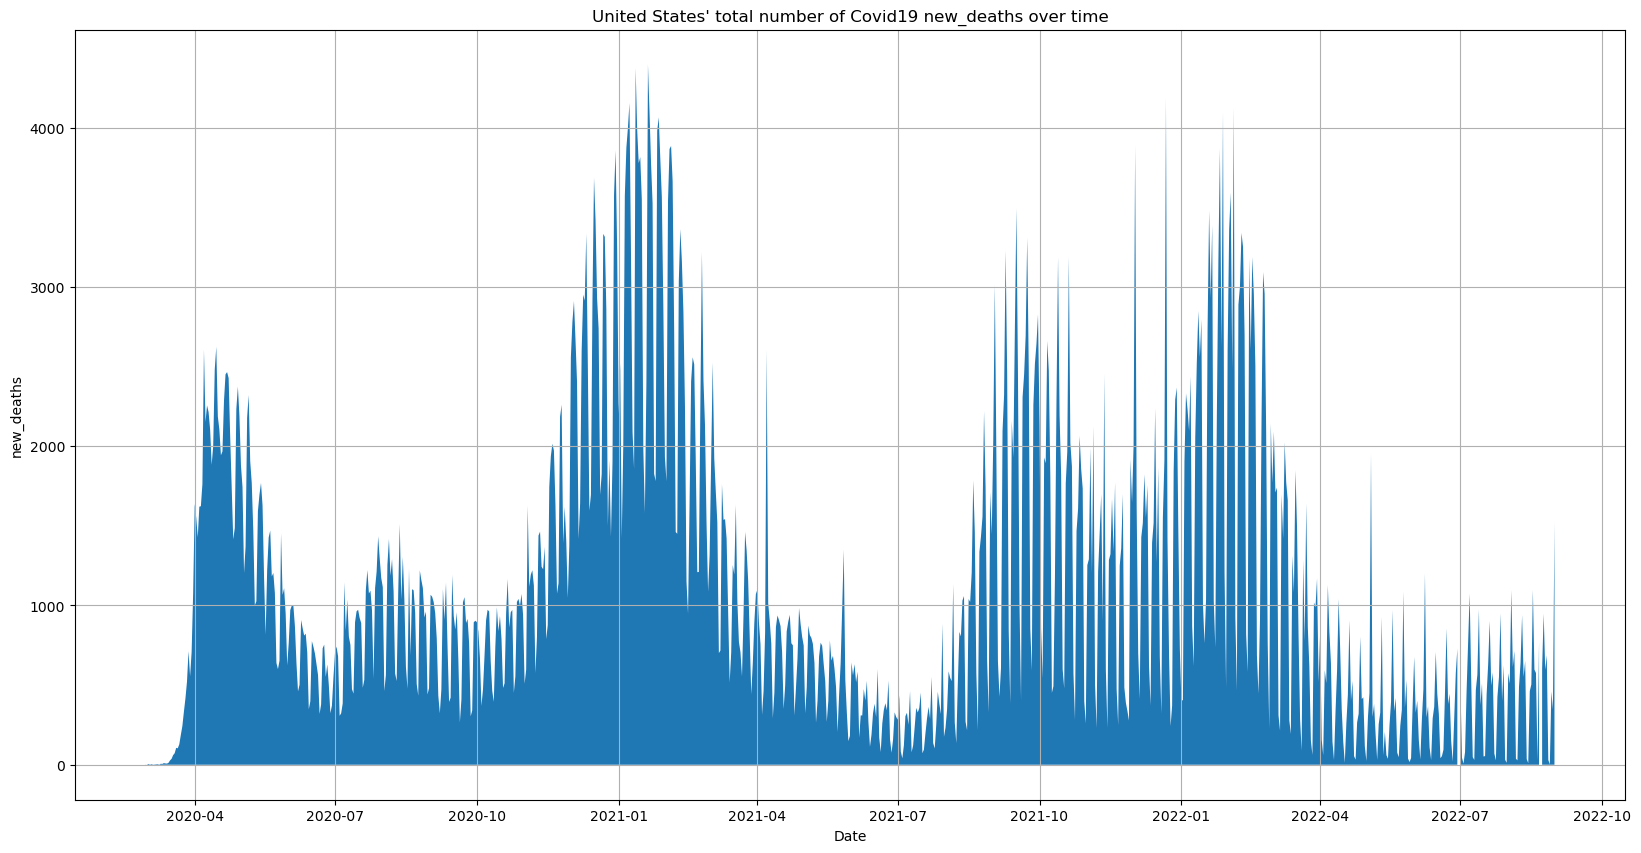

In [92]:
TrackFeatureByCountryGraph("United States","new_deaths")

Change Qualitative to Quantitative

In [93]:
def QualitativeToQuantitative(feature: string, dataset):
    dictionary_replacement_value = {}
    for index, value in enumerate(dataset[feature].unique()):
        dictionary_replacement_value[value] = index
    dataset[feature] = dataset[feature].replace(dictionary_replacement_value)
    return dataset

Excess mortality rate.
Since most of the excess mortality is either innacurate and/or missing, I believe the best course of action is to drop the four columns
associated with it ['excess_mortality_cumulative_absolute','excess_mortality_cumulative','excess_mortality','excess_mortality_cumulative_per_million'].
More information as to why it was drop will be available in the Readme in github.

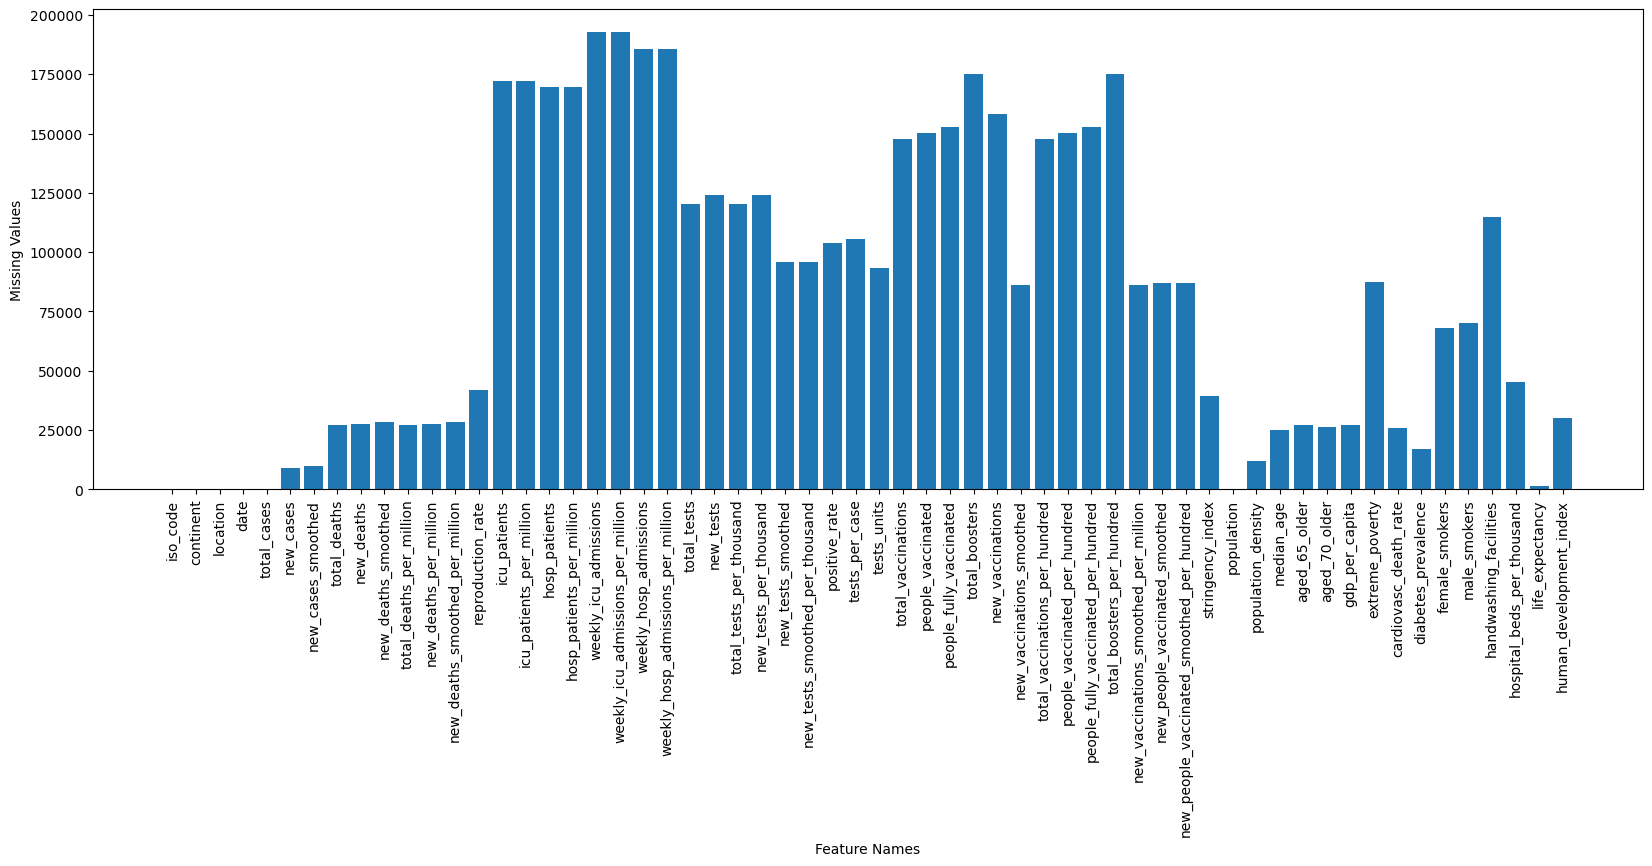

In [94]:
dataset = dataset.drop(columns=['excess_mortality_cumulative_absolute','excess_mortality_cumulative','excess_mortality','excess_mortality_cumulative_per_million'])

dataset['total_cases'] = dataset['total_cases'].fillna(0) #countries that have na in their value is due to the fact that they did not
#gather data about it either before the first confirm case was confirmed in the respective country or other reason that migt be more political
dataset = dataset.drop(columns=['total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million'])
#dropped the features above because they give the same information as having 'total_cases','new_cases','new_cases_smoothed'
graphMissingDataValues()

While using the location feature for cleaning, keep the data cleaning code before the QualitativeToQuantitative function.QuantativeToNumerical is a slow function (Might be better to create the dictionary list on one's own)

In [95]:
#dataset = QualitativeToQuantitative("location",dataset)